# Employee Attrition Prediction Machine Learning Model

In [5]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading data and checking the first 5 rows
emp_data = pd.read_csv('Employee_Attrition.csv')
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#checking the size of the data
emp_data.shape

(14999, 10)

In [8]:
#checking types of columns and null values
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#checking for duplicates
emp_data[emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
#dropping duplicates and checking the size of the new data
emp_data1 = emp_data.drop_duplicates()
emp_data1.shape

(11991, 10)

In [11]:
#checking for null values
emp_data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Data Exploration and Visualization

In [12]:
#checking ratio of employees who left vs those who stayed
emp_data1.left.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

**Impact of salary on employee retention**

In [13]:
pd.crosstab(emp_data1.salary, emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


**Employee retention rate by department**  

In [14]:
pd.crosstab(emp_data1.Department, emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


**Distribution of numerical features**

In [15]:
num_feature_list = [f for f in emp_data1.columns if emp_data1[f].dtype == 'float64' or emp_data1[f].dtype == 'int64' and f != 'left']
num_feature_list

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [16]:
num_col_list = ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']

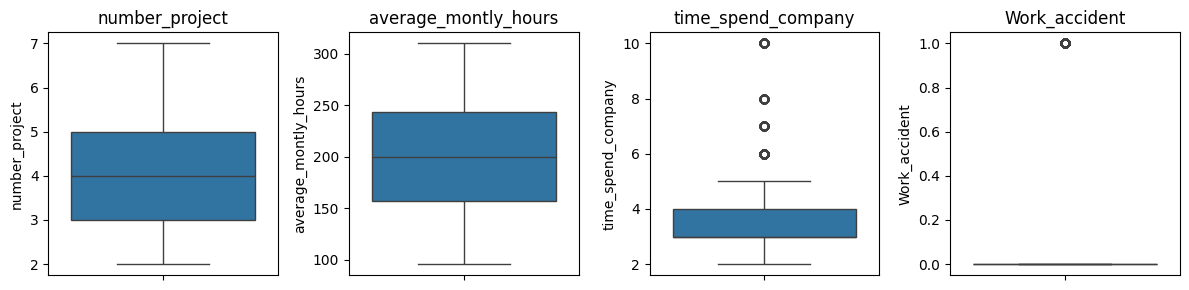

In [17]:
fig, axes = plt.subplots(ncols = 4, figsize = (12, 3))
for column, axis in zip(num_col_list[:4], axes):
    sns.boxplot(data = emp_data1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

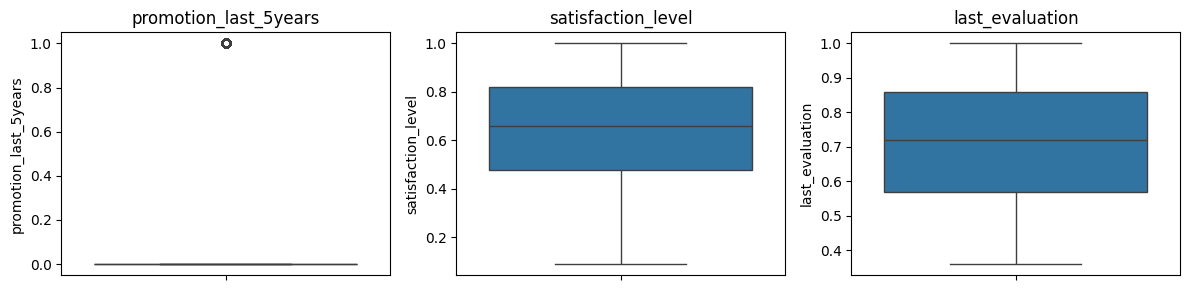

In [18]:
fid, axes = plt.subplots(ncols = 3, figsize = (12, 3))
for column, axis in zip(num_col_list[4:], axes):
    sns.boxplot(data = emp_data1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

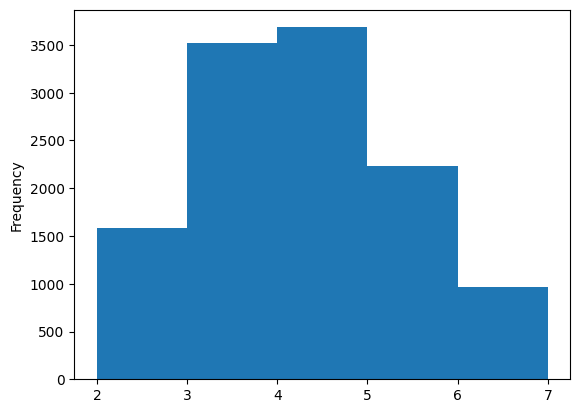

In [19]:
emp_data1.number_project.plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

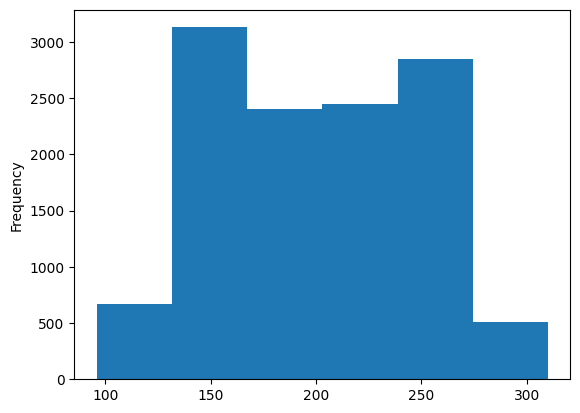

In [20]:
emp_data1.average_montly_hours.plot(kind = 'hist', bins = 6)

<Axes: ylabel='Frequency'>

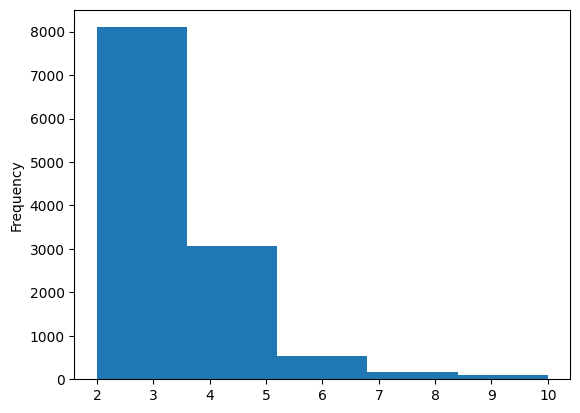

In [21]:
emp_data1.time_spend_company.plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

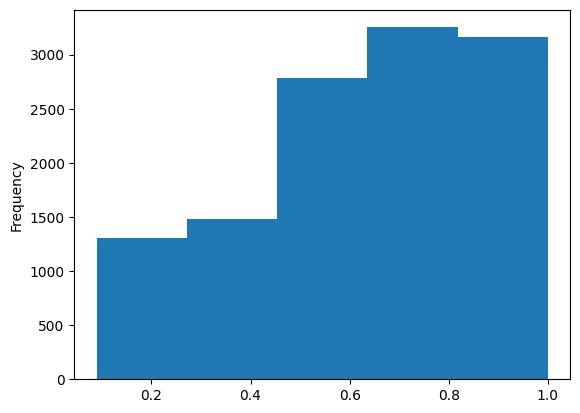

In [22]:
emp_data1.satisfaction_level.plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

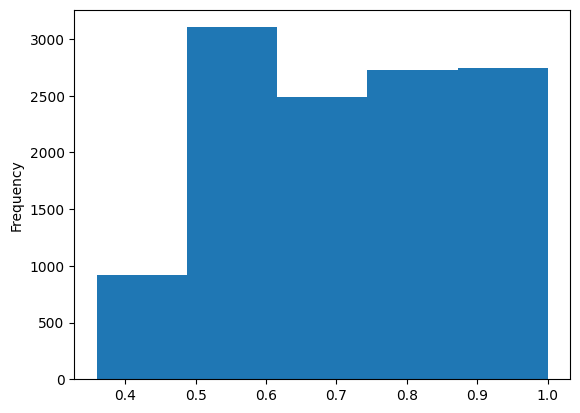

In [23]:
emp_data1.last_evaluation.plot(kind = 'hist', bins = 5)

## Feature Creation

**Label Encoding:**\
Converting categorical features into numerical

In [24]:
#%pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
emp_data1.salary = le.fit_transform(emp_data1.salary)
emp_data1.Department = le.fit_transform(emp_data1.Department)

C:\Users\jackn\AppData\Local\Temp\ipykernel_16336\3737551022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data1.salary = le.fit_transform(emp_data1.salary)
C:\Users\jackn\AppData\Local\Temp\ipykernel_16336\3737551022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data1.Department = le.fit_transform(emp_data1.Department)


In [26]:
emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


**Dependent (Target) and Independent Variable**

In [27]:
x = emp_data1.drop(['left'], axis = 1)
y = emp_data1.left

**Split into Training and Testing Sets**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.transform(x_test)

In [31]:
xtrain_scaled
xtest_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]], shape=(2399, 9))

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
Random_forest_model = RandomForestClassifier()

**Model Training**

In [34]:
Random_forest_model.fit(xtrain_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Model Prediction**

In [35]:
y_pred = Random_forest_model.predict(xtest_scaled)

**Model Evaluation**

Confusion Matrix:

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1991    7]
 [  39  362]]


<Axes: >

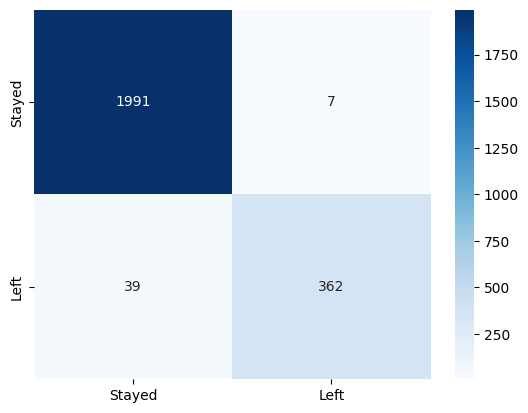

In [37]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])

Classification Report:

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Feature Importance Matrix:

In [39]:
score_list = Random_forest_model.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({'Feature': list_of_features, 'Importance': score_list})
score_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,satisfaction_level,0.347689
2,number_project,0.186425
4,time_spend_company,0.161148
3,average_montly_hours,0.153357
1,last_evaluation,0.126552
7,Department,0.011777
8,salary,0.007463
5,Work_accident,0.004847
6,promotion_last_5years,0.000742


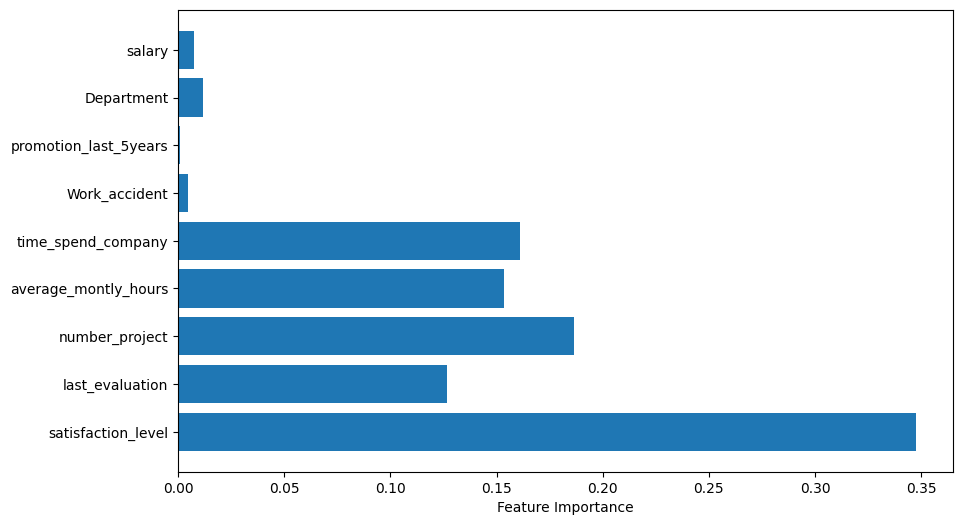

In [40]:
list_of_features = list(x.columns)
plt.figure(figsize=(10, 6))
plt.barh(range(len(list_of_features)), Random_forest_model.feature_importances_)
plt.yticks(range(len(list_of_features)), list_of_features)
plt.xlabel('Feature Importance')
plt.show()

k-fold Cross Validation:

In [41]:
#5-fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores: ", scores)

Cross-validation scores:  [0.9885357  0.98228244 0.98488008 0.98540146 0.98748697]


In [42]:
avg_model_score = np.mean(scores)
print("Average model score: ", avg_model_score)

Average model score:  0.9857173286616845


## Hyperparameter Optimization

**Grid Search CV:**

In [ ]:
from sklearn.model_selection import GridSearchCV

**List of Parameters:**

In [ ]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

**Search best parameters:**

In [52]:
grid_search = GridSearchCV(estimator=Random_forest_model, param_grid=parameters)

In [53]:
grid_search.fit(xtrain_scaled, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': ['sqrt', 'log2', ...], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


**Best parameters:**

In [54]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

**Build new model with best parameters:**

In [55]:
Random_forest_model_optimized = RandomForestClassifier(n_estimators=100, max_features='log2')

In [56]:
Random_forest_model_optimized.fit(xtrain_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


k-fold Cross Validation:

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_optimized, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores: ", scores)

Cross-validation scores:  [0.9890568  0.98384575 0.98488008 0.98540146 0.98748697]


Average accuracy of cross validation:

In [58]:
avg_model_score = scores.mean()
print("Average Model Score: ", avg_model_score)

Average Model Score:  0.9861342124553272
